In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

csv_file = ("output/reports/attack.csv")
data = pd.read_csv(csv_file)
# data = data[data['def_gen'] == 'HighConfidence']
if "Unnamed: 0" in data.columns:
    data.drop("Unnamed: 0", axis=1, inplace=True)

FOLDER = Path(Path(), "output/plots")
FOLDER.mkdir(parents=True, exist_ok=True)


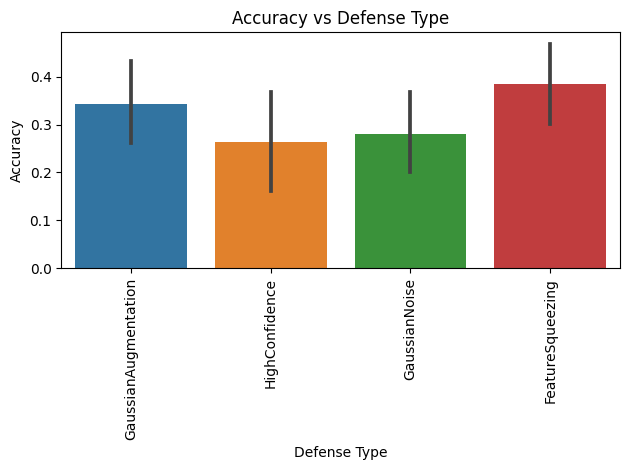

In [2]:
import seaborn as sns
graph1 = sns.barplot(data=data, x = "def_gen", y = "accuracy")
graph1.set_xticklabels(graph1.get_xticklabels(), rotation=90)
graph1.set_xlabel("Defense Type");
graph1.set_ylabel("Accuracy");
graph1.set_title("Accuracy vs Defense Type");
graph1.get_figure().tight_layout()
graph1.get_figure().savefig(FOLDER / "accuracy_vs_defense_type.png")


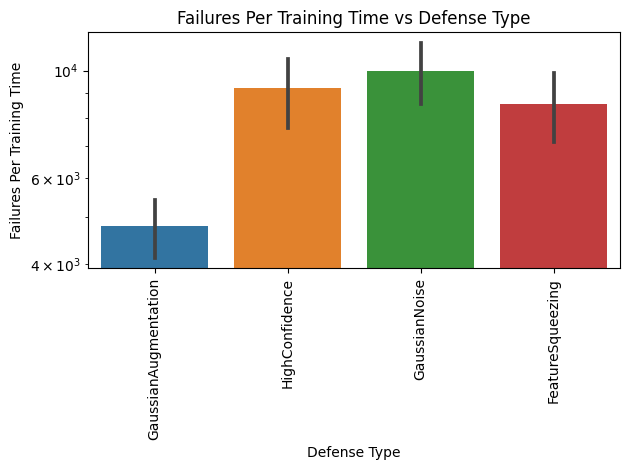

In [3]:

data['failures_per_training_time'] = (1 - data['accuracy']) / data['train_time_per_sample']

graph2 = sns.barplot(data=data, x = "def_gen", y = "failures_per_training_time")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90);
graph2.set_yscale("log")
graph2.set_xlabel("Defense Type");
graph2.set_ylabel("Failures Per Training Time");
graph2.set_title("Failures Per Training Time vs Defense Type");
graph2.get_figure().tight_layout()
graph2.get_figure().savefig(FOLDER / "def_vs_failure_rate.pdf")



In [4]:

control_dict = {
    "FeatureSqueezing": "model.art.pipeline.preprocessor.kwargs.bit_depth",
    "GaussianAugmentation": "model.art.pipeline.preprocessor.kwargs.ratio",
    "HighConfidence": "model.art.pipeline.postprocessor.kwargs.cutoff",
    "GaussianNoise": "model.art.pipeline.postprocessor.kwargs.scale",
    "HSJ" : "attack.init.kwargs.max_eval",
    "FGM" : "attack.init.kwargs.eps",
    "PGD" : "attack.init.kwargs.eps",
    "DeepFool" : "attack.init.kwargs.nb_grads",
    "CarliniL2" : "attack.init.kwargs.eps",
    "CarliniLInf" : "attack.init.kwargs.eps",
    np.nan : "None"
}

def merge_control(data, control_dict):
    for key, value in control_dict.items():
        for i, entry in data.iterrows():
            if "def_gen" in entry and entry["def_gen"] == key:
                data.loc[i, 'def_param'] = value.split(".")[-1]
                data.loc[i, 'def_value'] = entry[value]
            if "atk_gen" in entry and entry["atk_gen"] == key:
                data.loc[i, 'atk_param'] = value.split(".")[-1]
                data.loc[i, 'atk_value'] = entry[value]
        if "def_value" in data.columns:
            max_ = data["def_value"].max()
            min_ = data["def_value"].min()
            data.loc[:, 'def_value'] = (data.loc[:, 'def_value'] - min_) / (max_ - min_)
        if "atk_value" in data.columns:
            max_ = data["atk_value"].max()
            min_ = data["atk_value"].min()
            data.loc[:, 'atk_value'] = (data.loc[:, 'atk_value'] - min_) / (max_ - min_) 
    
    data.def_gen.fillna("None", inplace=True)
    data.def_param.fillna("None", inplace=True)
    data.def_value.fillna(0, inplace=True)
    
    data.atk_gen.fillna("None", inplace=True)
    data.atk_param.fillna("None", inplace=True)
    data.atk_value.fillna(0, inplace=True)
    
    return data
        
    

data = merge_control(data, control_dict)

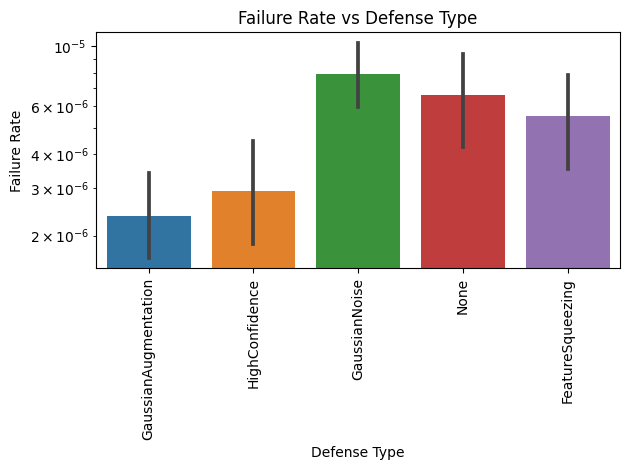

In [5]:

data['failure_rate'] = (1 - data['accuracy']) * data['predict_time_per_sample']

graph2 = sns.barplot(data=data, x = "def_gen", y = "failure_rate")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
graph2.set_yscale("log")
graph2.set_xlabel("Defense Type");
graph2.set_ylabel("Failure Rate");
graph2.set_title("Failure Rate vs Defense Type");
graph2.get_figure().tight_layout()
graph2.get_figure().savefig(FOLDER / "def_vs_failure_rate.pdf")


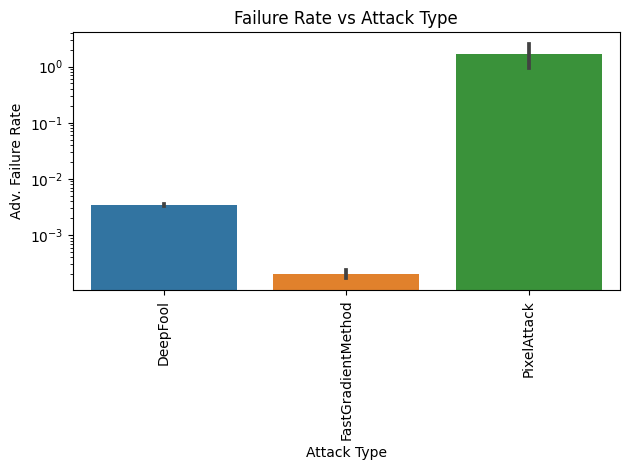

In [6]:

data['adv_failure_rate'] = (1 - data['adv_accuracy']) * data['adv_fit_time_per_sample']

graph2 = sns.barplot(data=data, x = "atk_gen", y = "adv_failure_rate")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
graph2.set_yscale("log")
graph2.set_xlabel("Attack Type");
graph2.set_ylabel("Adv. Failure Rate");
graph2.set_title("Failure Rate vs Attack Type");
graph2.get_figure().tight_layout()
graph2.get_figure().savefig(FOLDER / "atk_vs_failure_rate.pdf")

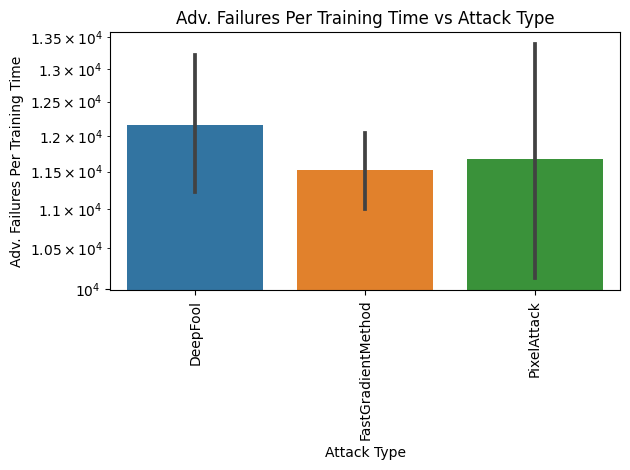

In [7]:

data['adv_failures_per_training_time'] = (1 - data['adv_accuracy']) / data['train_time_per_sample']

graph2 = sns.barplot(data=data, x = "atk_gen", y = "adv_failures_per_training_time")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
graph2.set_yscale("log")
graph2.set_xlabel("Attack Type");
graph2.set_ylabel("Adv. Failures Per Training Time");
graph2.set_title("Adv. Failures Per Training Time vs Attack Type");
graph2.get_figure().tight_layout()
graph2.get_figure().savefig(FOLDER / "atk_vs_train_rate.pdf")

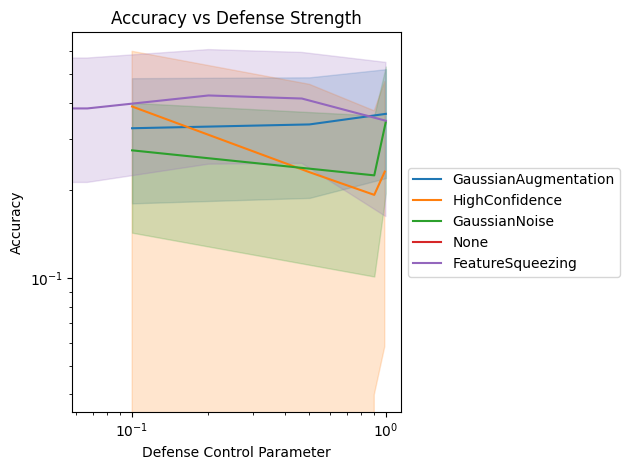

In [8]:

graph4 = sns.lineplot(data=data, x = "def_value", y = "accuracy", hue = "def_gen")
graph4.set_yscale("log")
graph4.set_xscale("log")
graph4.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
graph4.set_xlabel("Defense Control Parameter");
graph4.set_ylabel("Accuracy");
graph4.set_title("Accuracy vs Defense Strength");
graph4.get_figure().tight_layout()
graph2.get_figure().savefig(FOLDER / "def_param_vs_accuracy.pdf")


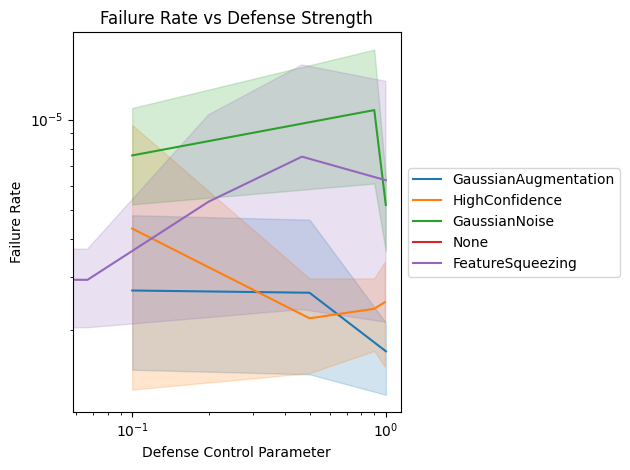

In [9]:
graph5 = sns.lineplot(data=data, x = "def_value", y = "failure_rate", hue = "def_gen")
graph5.set_yscale("log")
graph5.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
graph5.set_xlabel("Defense Control Parameter");
graph5.set_ylabel("Failure Rate");
graph5.set_title("Failure Rate vs Defense Strength");
graph5.set_xscale("log")
graph5.get_figure().tight_layout()
graph5.get_figure().savefig(FOLDER / "def_param_vs_failure_rate.pdf")

In [10]:

from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
from sklearn.preprocessing import MinMaxScaler
# constants
scorer = "accuracy"

subset = data.copy()
subset = subset[subset['atk_gen'] == 'FastGradientMethod']
subset['atk_value'] = subset['attack.init.kwargs.eps']
cleaned = pd.DataFrame()
cleaned['accuracy'] = subset['accuracy']
cleaned['train_time'] = subset['train_time']
cleaned['adv_fit_time'] = subset['adv_fit_time']
cleaned['adv_accuracy'] = subset['adv_accuracy']
cleaned['atk_value'] = subset['atk_value']
cleaned['def_value'] = subset['def_value']
cleaned['adv_fit_time'] = subset['adv_fit_time']
cleaned['adv_fit_time_per_sample'] = subset['adv_fit_time_per_sample']
cleaned['adv_accuracy'] = subset['adv_accuracy']
cleaned['random_state'] = subset['data.sample.random_state']
cleaned['adv_failure_rate'] = subset['adv_failure_rate']
cleaned['failure_rate'] = subset['failure_rate']

cleaned = cleaned[cleaned.columns.drop(list(cleaned.filter(regex='.1')))]
cleaned.fillna(method="ffill", inplace=True)
cleaned.fillna(method="bfill", inplace=True)
cleaned = cleaned[cleaned.columns.drop(list(cleaned.filter(regex='.1')))]
scaler = MinMaxScaler((0,1))
scaler = scaler.fit(cleaned)
cleaned_numeric = scaler.transform(cleaned)
cleaned_cols = cleaned.columns
cleaned = pd.DataFrame(cleaned_numeric, columns=cleaned_cols)

cleaned.head()

,accuracy,train_time,adv_fit_time,adv_accuracy,atk_value,def_value,adv_fit_time_per_sample,random_state,adv_failure_rate,failure_rate
0,0.114225,0.484915,0.110723,0.70,0.249061,0.999,0.110723,0.111111,0.108272,0.155836
1,0.000000,0.479475,0.070095,0.00,0.000000,0.500,0.070095,0.555556,0.092263,0.045455
2,0.114955,0.965790,0.084068,0.30,0.036295,1.000,0.084068,0.666667,0.097066,0.076206
3,0.100796,0.238059,0.018498,0.65,0.374218,0.000,0.018498,0.333333,0.020614,0.053585
4,0.098241,0.134304,0.009409,0.30,0.036295,0.000,0.009409,0.000000,0.018555,0.041638


In [12]:
times = []
statuses = []
new_data = pd.DataFrame()
size = 100
new_cleaned = cleaned.copy()
i = 0
for _, row in new_cleaned.iterrows():
    times = np.random.uniform(0.000001, row['adv_fit_time_per_sample'], size)
    score = float(row.adv_accuracy)
    status = np.random.binomial(1, score, size)
    assert len(times) == len(status)
    assert len(times) == size
    del row['accuracy']
    del row['adv_accuracy']
    del row['adv_fit_time']
    del row['adv_fit_time_per_sample']
    results = row.to_dict()
    results['random_state'] = row['random_state']
    del results['failure_rate']
    del results['adv_failure_rate']
    results['status'] = status
    sub_indices = range(i*size, size + (i*size))
    assert len(sub_indices) == len(status) == len(times) == size
    sub_data = pd.DataFrame(results, index=sub_indices)
    sub_data = sub_data.explode('status').reset_index(drop=True)
    sub_data['time'] = times
    i += 1
    sub_data['index'] = sub_indices
    
    new_data = pd.concat([new_data, sub_data], axis=0)
    new_data = new_data.reindex()
    
new_data = new_data.loc[:,~new_data.columns.duplicated()]
new_data.index = range(len(new_data))
new_data = new_data[new_data.columns.drop(list(new_data.filter(regex='.1')))]
new_data.fillna(method="ffill", inplace=True)
new_data.fillna(method="bfill", inplace=True)
new_data = new_data[new_data.columns.drop(list(new_data.filter(regex='.1')))]
assert np.sum(new_data.index.duplicated()) == np.sum(new_data.columns.duplicated()) == 0, f"{np.sum(new_data.index.duplicated())} {np.sum(new_data.columns.duplicated())}"
new_data.drop("index", axis=1, inplace=True)


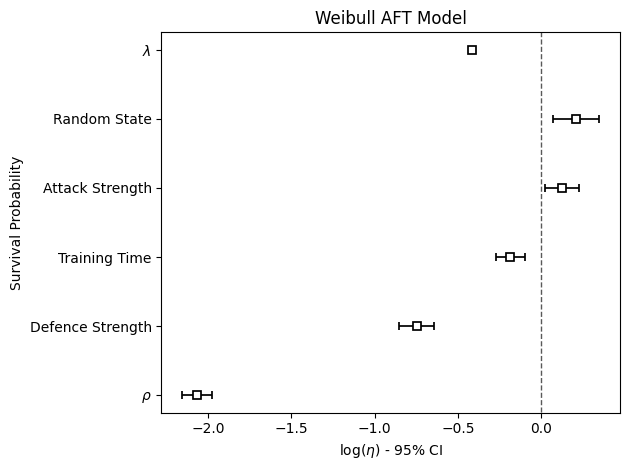

In [13]:

wft = WeibullAFTFitter()
wft.fit(new_data, duration_col='time', event_col='status')
ax = wft.plot()
ax.set_ylabel("Survival Probability")
ax.set_yticklabels(["$\\rho$", "Defence Strength", "Training Time", "Attack Strength", "Random State", '$\lambda$'])
ax.set_xlabel("$\log(\eta)$ - 95% CI");
ax.set_title("Weibull AFT Model");
ax.get_figure().tight_layout()
ax.get_figure().savefig(FOLDER / "weibull_aft.pdf")
    

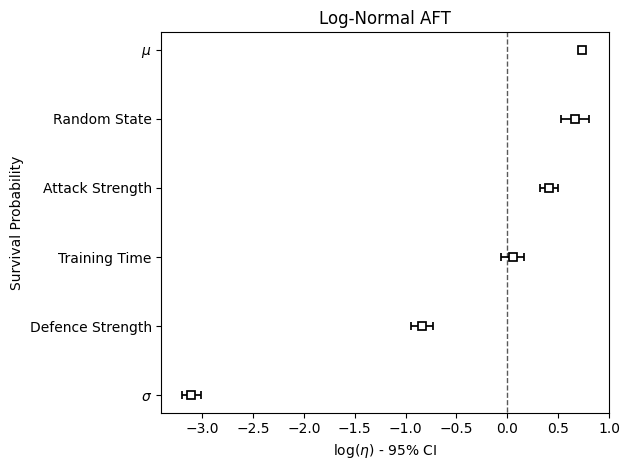

In [14]:

lnt = LogNormalAFTFitter()
lnt.fit(new_data, duration_col='time', event_col='status')
ax = lnt.plot()
ax.set_ylabel("Survival Probability")
ax.set_yticklabels(["$\sigma$", "Defence Strength", "Training Time", "Attack Strength", "Random State", '$\mu$'])
ax.set_xlabel("$\log(\eta)$ - 95% CI");
ax.set_title("Log-Normal AFT");
ax.get_figure().tight_layout()
ax.get_figure().savefig(FOLDER / "log_normal_aft.pdf")

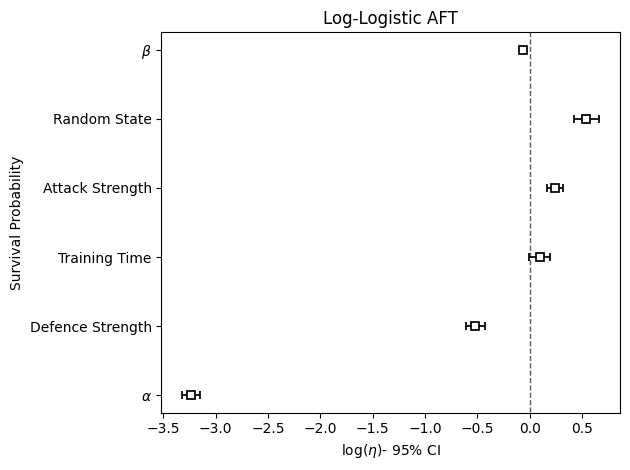

In [15]:
llt = LogLogisticAFTFitter()
llt.fit(new_data, duration_col='time', event_col='status')
ax = llt.plot()
ax.set_ylabel("Survival Probability")
ax.set_yticklabels(["$\\alpha$", "Defence Strength", "Training Time", "Attack Strength", "Random State", '$\\beta$'])
ax.set_xlabel("$\log(\eta) $- 95% CI");
ax.set_title("Log-Logistic AFT");
ax.get_figure().tight_layout()
ax.get_figure().savefig(FOLDER / "log_logistic_aft.pdf")

Weibull AIC: -25303.320617009416
LogNormal AIC: -25197.740425138923
LogLogistic AIC: -26302.35391391413


AttributeError: 'NoneType' object has no attribute 'savefig'

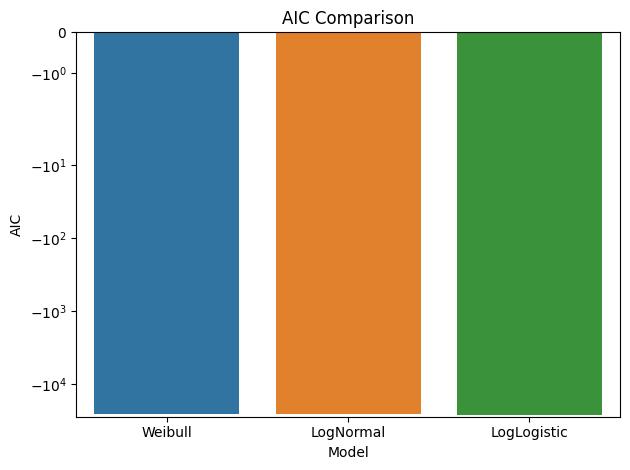

In [16]:
print(f"Weibull AIC: {wft.AIC_}")
print(f"LogNormal AIC: {lnt.AIC_}")
print(f"LogLogistic AIC: {llt.AIC_}")

aft_data = {
    "Weibull" : wft.AIC_,
    "LogNormal" : lnt.AIC_,
    "LogLogistic" : llt.AIC_,
}
aft_data = pd.DataFrame.from_dict(aft_data, orient='index', columns=['AIC'])
aft_data.index.name = "Model"
aic_graph = sns.barplot(data=aft_data, x=aft_data.index, y='AIC')
aic_graph.set_ylabel("AIC");
aic_graph.set_xlabel("Model");
aic_graph.set_title("AIC Comparison");
aic_graph.set_yscale("symlog")
aic_graph.get_figure().tight_layout().savefig(FOLDER / "aic_comparison.pdf")


aft_data['LogLikelihood'] = [wft.log_likelihood_, lnt.log_likelihood_, llt.log_likelihood_]
aft_data['Concordance Score'] = [wft.concordance_index_, lnt.concordance_index_, llt.concordance_index_]
aft_data['BIC'] = [wft.BIC_, lnt.BIC_, llt.BIC_]
aft_data = aft_data.round(2)
aft_data.to_csv(FOLDER / "aft_comparison.csv")
aft_data

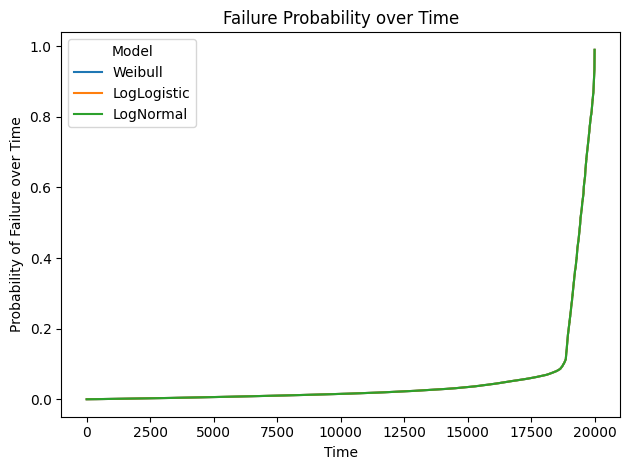

In [17]:

# print(f"Weibull Standard Errors: ")
# print(wft.standard_errors_)
# print(f"LogNormal Standard Errors: ")
# print(lnt.standard_errors_)
# print(f"LogLogistic Standard Errors: ")
# print(llt.standard_errors_)

wft_timeline = wft.timeline
wft_type = ["Weibull"] * len(wft_timeline)
aft_df = pd.DataFrame(wft_type, columns=["Model"])
aft_df['CDF'] = wft_timeline
aft_df['Time'] = range(len(wft_timeline))

llt_timeline = llt.timeline
llt_type = ["LogLogistic"] * len(llt_timeline)
llt_df = pd.DataFrame(llt_type, columns=["Model"])
llt_df['CDF'] = llt_timeline
llt_df['Time'] = range(len(llt_timeline))
aft_df = pd.concat([aft_df, llt_df], axis=0)

lnt_timeline = lnt.timeline
lnt_type = ["LogNormal"] * len(lnt_timeline)
lnt_df = pd.DataFrame(lnt_type, columns=["Model"])
lnt_df['CDF'] = lnt_timeline
lnt_df['Time'] = range(len(lnt_timeline))
aft_df = pd.concat([aft_df, lnt_df], axis=0)

aft_cdf = sns.lineplot(data=aft_df, x="Time", y="CDF", hue="Model")
aft_cdf.set_ylabel("Probability of Failure over Time");
aft_cdf.set_xlabel("Time");
aft_cdf.set_title("Failure Probability over Time");
aft_cdf.get_figure().tight_layout()
aft_cdf.get_figure().savefig(FOLDER / "aft_cdf.pdf")

In [18]:
from paretoset import paretoset
subset = data[data["atk_gen"] == "FastGradientMethod"]

score_dict = pd.DataFrame()
# score_dict['accuracy'] = subset.loc[:, "accuracy"]
# score_dict['failure_rate'] = subset.loc[:, "failure_rate"]
score_dict['adv_failure_rate'] = subset.loc[:, "adv_failure_rate"]
score_dict['train_time'] = subset.loc[:, "train_time"]
score_dict['atk_gen'] = subset.loc[:, "atk_gen"]
score_dict['def_gen'] = subset.loc[:, "def_gen"]
# score_dict['adv_failure_rate'] = subset.loc[:, "adv_failure_rate"]
# score_dict['train_time_per_sample'] = subset.loc[:, "train_time_per_sample"]
# score_dict['adv_fit_time_per_sample'] = subset.loc[:, "adv_fit_time_per_sample"]


pareto = paretoset(score_dict,  sense=["min", "min", "diff", "diff"])
subset = subset[pareto]
subset

,stage,attack,data,files,kwargs,model,name,scorers,train_time,train_time_per_sample,...,def_gen,atk_gen,failures_per_training_time,def_param,def_value,atk_param,atk_value,failure_rate,adv_failure_rate,adv_failures_per_training_time
20,attack,art.attacks.evasion.FastGradientMethod,0d8b6801692c39875877ec55cf7f6ce7,0d8b6801692c39875877ec55cf7f6ce7,0d8b6801692c39875877ec55cf7f6ce7,0d8b6801692c39875877ec55cf7f6ce7,0d8b6801692c39875877ec55cf7f6ce7,0d8b6801692c39875877ec55cf7f6ce7,7.032718,0.000126,...,GaussianAugmentation,FastGradientMethod,7187.547857,ratio,1.000000,None,0.0,1.877505e-06,0.000096,7166.503363
41,attack,art.attacks.evasion.FastGradientMethod,23997f35dec6179a1512bd6d4af039e5,23997f35dec6179a1512bd6d4af039e5,23997f35dec6179a1512bd6d4af039e5,23997f35dec6179a1512bd6d4af039e5,23997f35dec6179a1512bd6d4af039e5,23997f35dec6179a1512bd6d4af039e5,2.640404,0.000047,...,GaussianNoise,FastGradientMethod,19103.135048,scale,0.999000,None,0.0,6.802474e-06,0.000115,19512.163316
50,attack,art.attacks.evasion.FastGradientMethod,27b8643dc2e7c707069100bd65e60121,27b8643dc2e7c707069100bd65e60121,27b8643dc2e7c707069100bd65e60121,27b8643dc2e7c707069100bd65e60121,27b8643dc2e7c707069100bd65e60121,27b8643dc2e7c707069100bd65e60121,3.167057,0.000057,...,FeatureSqueezing,FastGradientMethod,15663.753818,bit_depth,0.466667,None,0.0,3.779050e-06,0.000107,15913.828262
69,attack,art.attacks.evasion.FastGradientMethod,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,3.129712,0.000056,...,None,FastGradientMethod,16028.310544,None,0.000000,None,0.0,2.059937e-06,0.000083,14314.414966
101,attack,art.attacks.evasion.FastGradientMethod,4528904786dcf952a3fb9cc870fb40dc,4528904786dcf952a3fb9cc870fb40dc,4528904786dcf952a3fb9cc870fb40dc,4528904786dcf952a3fb9cc870fb40dc,4528904786dcf952a3fb9cc870fb40dc,4528904786dcf952a3fb9cc870fb40dc,3.877275,0.000069,...,HighConfidence,FastGradientMethod,12961.680007,cutoff,0.100000,None,0.0,3.241337e-06,0.000104,13287.682146
110,attack,art.attacks.evasion.FastGradientMethod,4b4ad9b7348be09ae3f9be98332d35c2,4b4ad9b7348be09ae3f9be98332d35c2,4b4ad9b7348be09ae3f9be98332d35c2,4b4ad9b7348be09ae3f9be98332d35c2,4b4ad9b7348be09ae3f9be98332d35c2,4b4ad9b7348be09ae3f9be98332d35c2,3.067246,0.000055,...,FeatureSqueezing,FastGradientMethod,16679.460083,bit_depth,0.066667,None,0.0,3.797089e-06,0.000145,16431.680770
156,attack,art.attacks.evasion.FastGradientMethod,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,2.521219,0.000045,...,None,FastGradientMethod,874.180440,None,0.000000,None,0.0,7.223012e-08,0.000085,19101.873862
162,attack,art.attacks.evasion.FastGradientMethod,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,2.434078,0.000043,...,None,FastGradientMethod,20321.448346,None,0.000000,None,0.0,2.393602e-06,0.000113,20936.054660
175,attack,art.attacks.evasion.FastGradientMethod,80cd17fe00ae556893221d78000b8be8,80cd17fe00ae556893221d78000b8be8,80cd17fe00ae556893221d78000b8be8,80cd17fe00ae556893221d78000b8be8,80cd17fe00ae556893221d78000b8be8,80cd17fe00ae556893221d78000b8be8,3.176910,0.000057,...,GaussianNoise,FastGradientMethod,15754.930955,scale,0.100000,None,0.0,6.471394e-06,0.000106,14983.111833
198,attack,art.attacks.evasion.FastGradientMethod,93e754f7f526c20ed72a6d123afc6b7e,93e754f7f526c20ed72a6d123afc6b7e,93e754f7f526c20ed72a6d123afc6b7e,93e754f7f526c20ed72a6d123afc6b7e,93e754f7f526c20ed72a6d123afc6b7e,93e754f7f526c20ed72a6d123afc6b7e,7.151529,0.000128,...,GaussianAugmentation,FastGradientMethod,7058.070811,ratio,1.000000,None,0.0,2.111730e-06,0.000096,6890.833853


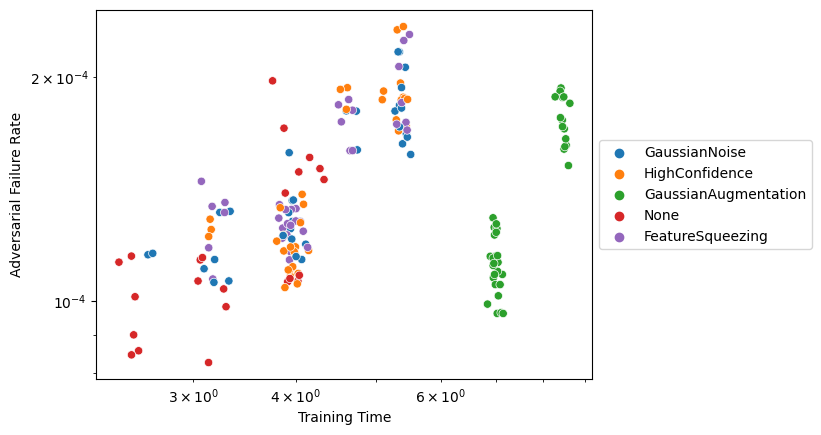

In [19]:
subset = data[data["atk_gen"] == "FastGradientMethod"]
graph6 = sns.scatterplot(data=subset, x = "train_time", y = "adv_failure_rate", hue = "def_gen")
graph6.set_yscale("log")
graph6.set_xscale("log")
graph6.set_xlabel("Training Time")
graph6.set_ylabel("Adversarial Failure Rate")
graph6.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [20]:
from paretoset import paretoset
subset = data[data["atk_gen"] == "FastGradientMethod"]

score_dict = pd.DataFrame()
# score_dict['def_gen'] = subset.loc[:, "def_gen"]
score_dict['accuracy'] = subset.loc[:, "accuracy"]
score_dict['failure_rate'] = subset.loc[:, "failure_rate"]
score_dict['adv_failure_rate'] = subset.loc[:, "adv_failure_rate"]
score_dict['train_time'] = subset.loc[:, "train_time"]
# score_dict['atk_gen'] = subset.loc[:, "atk_gen"]
# score_dict['adv_failure_rate'] = subset.loc[:, "adv_failure_rate"]
# score_dict['train_time_per_sample'] = subset.loc[:, "train_time_per_sample"]
# score_dict['adv_fit_time_per_sample'] = subset.loc[:, "adv_fit_time_per_sample"]


pareto = paretoset(score_dict,  sense=["max", "min", "min", "min",])
subset = subset[pareto]
subset
# graph6 = sns.scatterplot(data=subset, x = "train_time", y = "adv_failure_rate", hue = "atk_gen")
# graph6.set_yscale("log")
# graph6.set_xscale("log")
# graph6.set_xlabel("Training Time")
# graph6.set_ylabel("Adversarial Failure Rate")
# graph6.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

,stage,attack,data,files,kwargs,model,name,scorers,train_time,train_time_per_sample,...,def_gen,atk_gen,failures_per_training_time,def_param,def_value,atk_param,atk_value,failure_rate,adv_failure_rate,adv_failures_per_training_time
25,attack,art.attacks.evasion.FastGradientMethod,149db699b156500a78c9c4d7db0183b3,149db699b156500a78c9c4d7db0183b3,149db699b156500a78c9c4d7db0183b3,149db699b156500a78c9c4d7db0183b3,149db699b156500a78c9c4d7db0183b3,149db699b156500a78c9c4d7db0183b3,4.021144,0.000072,...,None,FastGradientMethod,297.427786,None,0.0,None,0.0,4.409449e-08,0.000106,12951.537693
45,attack,art.attacks.evasion.FastGradientMethod,258c26af8e1678e2cebc0cfcb2bcffce,258c26af8e1678e2cebc0cfcb2bcffce,258c26af8e1678e2cebc0cfcb2bcffce,258c26af8e1678e2cebc0cfcb2bcffce,258c26af8e1678e2cebc0cfcb2bcffce,258c26af8e1678e2cebc0cfcb2bcffce,3.937589,0.000070,...,HighConfidence,FastGradientMethod,516.051879,cutoff,0.1,None,0.0,7.900118e-08,0.000108,14221.902185
69,attack,art.attacks.evasion.FastGradientMethod,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,32e26331e5116bda88529386d60e5316,3.129712,0.000056,...,None,FastGradientMethod,16028.310544,None,0.0,None,0.0,2.059937e-06,0.000083,14314.414966
77,attack,art.attacks.evasion.FastGradientMethod,360a06afe61ad5bc791bf8cca877e3f8,360a06afe61ad5bc791bf8cca877e3f8,360a06afe61ad5bc791bf8cca877e3f8,360a06afe61ad5bc791bf8cca877e3f8,360a06afe61ad5bc791bf8cca877e3f8,360a06afe61ad5bc791bf8cca877e3f8,7.109662,0.000127,...,GaussianAugmentation,FastGradientMethod,279.619480,ratio,0.1,None,0.0,7.095042e-08,0.000096,7404.008777
83,attack,art.attacks.evasion.FastGradientMethod,392a03685dba35927b1b7a6aaad0bf87,392a03685dba35927b1b7a6aaad0bf87,392a03685dba35927b1b7a6aaad0bf87,392a03685dba35927b1b7a6aaad0bf87,392a03685dba35927b1b7a6aaad0bf87,392a03685dba35927b1b7a6aaad0bf87,3.918234,0.000070,...,GaussianNoise,FastGradientMethod,329.740390,scale,0.9,None,0.0,1.809624e-07,0.000131,12720.016273
86,attack,art.attacks.evasion.FastGradientMethod,3b46c712d5d39d40b4feba3cb0aa4615,3b46c712d5d39d40b4feba3cb0aa4615,3b46c712d5d39d40b4feba3cb0aa4615,3b46c712d5d39d40b4feba3cb0aa4615,3b46c712d5d39d40b4feba3cb0aa4615,3b46c712d5d39d40b4feba3cb0aa4615,3.152700,0.000056,...,HighConfidence,FastGradientMethod,569.670528,cutoff,0.9,None,0.0,6.457692e-08,0.000125,17762.555454
102,attack,art.attacks.evasion.FastGradientMethod,4558b1a467e170419777b0d06b93f1d6,4558b1a467e170419777b0d06b93f1d6,4558b1a467e170419777b0d06b93f1d6,4558b1a467e170419777b0d06b93f1d6,4558b1a467e170419777b0d06b93f1d6,4558b1a467e170419777b0d06b93f1d6,7.055440,0.000126,...,GaussianAugmentation,FastGradientMethod,295.374909,ratio,0.1,None,0.0,7.447871e-08,0.000102,7064.052515
105,attack,art.attacks.evasion.FastGradientMethod,4894e179b76476dadbba264edd025896,4894e179b76476dadbba264edd025896,4894e179b76476dadbba264edd025896,4894e179b76476dadbba264edd025896,4894e179b76476dadbba264edd025896,4894e179b76476dadbba264edd025896,3.932268,0.000070,...,None,FastGradientMethod,426.217122,None,0.0,None,0.0,9.509274e-08,0.000107,13671.499091
156,attack,art.attacks.evasion.FastGradientMethod,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,714ae824d7f36a49913154cc301c35c3,2.521219,0.000045,...,None,FastGradientMethod,874.180440,None,0.0,None,0.0,7.223012e-08,0.000085,19101.873862
162,attack,art.attacks.evasion.FastGradientMethod,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,7572d2a9a31ac45179f16eec2ab980d2,2.434078,0.000043,...,None,FastGradientMethod,20321.448346,None,0.0,None,0.0,2.393602e-06,0.000113,20936.054660


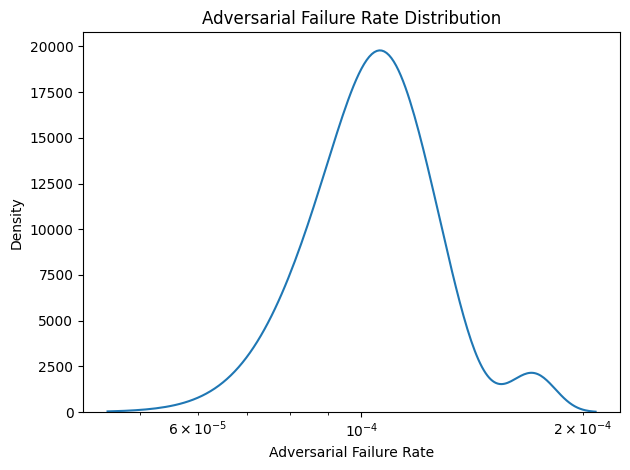

In [21]:

# subset = data[pareto].sort_values(by="adv_failure_rate", ascending=True)
failure_hist = sns.kdeplot(subset['adv_failure_rate'])
failure_hist.set_xlabel("Adversarial Failure Rate")
failure_hist.set_xscale("log")
failure_hist.set_ylabel("Density")
failure_hist.set_title("Adversarial Failure Rate Distribution")
failure_hist.get_figure().tight_layout()
failure_hist.get_figure().savefig(FOLDER / "adv_failure_rate_dist.pdf")

/tmp/ipykernel_2042822/4212399766.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  failure_hist = sns.distplot(subset['train_time'], hist=False, rug=True, label="Accuracy")


AttributeError: 'NoneType' object has no attribute 'savefig'

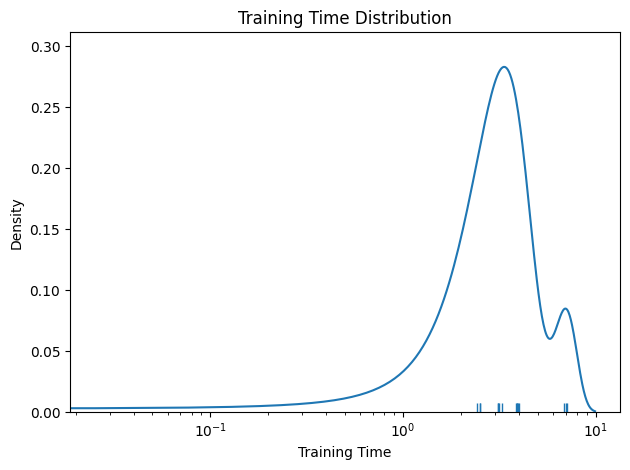

In [22]:

# subset = data[pareto].sort_values(by="train_time", ascending=True)
failure_hist = sns.distplot(subset['train_time'], hist=False, rug=True, label="Accuracy")
failure_hist.set_xlabel("Training Time")
failure_hist.set_xscale("log")
failure_hist.set_title("Training Time Distribution")
failure_hist.get_figure()
failure_hist.get_figure().tight_layout().savefig(FOLDER / "train_time_dist.pdf")

In [ ]:
from paretoset import paretoset
subset = data[data["atk_gen"] == "FastGradientMethod"]

score_dict = pd.DataFrame()
# score_dict['accuracy'] = subset.loc[:, "accuracy"]
# score_dict['failure_rate'] = subset.loc[:, "failure_rate"]
score_dict['adv_failure_rate'] = subset.loc[:, "adv_failure_rate"]
score_dict['train_time'] = subset.loc[:, "train_time"]
score_dict['atk_gen'] = subset.loc[:, "atk_gen"]
score_dict['def_gen'] = subset.loc[:, "def_gen"]
# score_dict['adv_failure_rate'] = subset.loc[:, "adv_failure_rate"]
# score_dict['train_time_per_sample'] = subset.loc[:, "train_time_per_sample"]
# score_dict['adv_fit_time_per_sample'] = subset.loc[:, "adv_fit_time_per_sample"]


pareto = paretoset(score_dict,  sense=["min", "min", "diff", "diff"])
subset = subset[pareto]
# pareto_graph = sns.lineplot(data=subset, x = "train_time", y = "adv_failure_rate", hue = "atk_gen")
# pareto_graph.set_yscale("log")
# pareto_graph.set_xscale("log")
# pareto_graph.set_xlabel("Training Time")
# pareto_graph.set_ylabel("Adversarial Failure Rate")
# pareto_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

accuracy: -0.018242446936627195
train_time: -0.0150490165656062
atk_value: -0.027217296111677912
def_value: 0.0436103752452956
adv_fit_time_per_sample: 0.9892249846303418
random_state: 0.0019054170804090477


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (5).

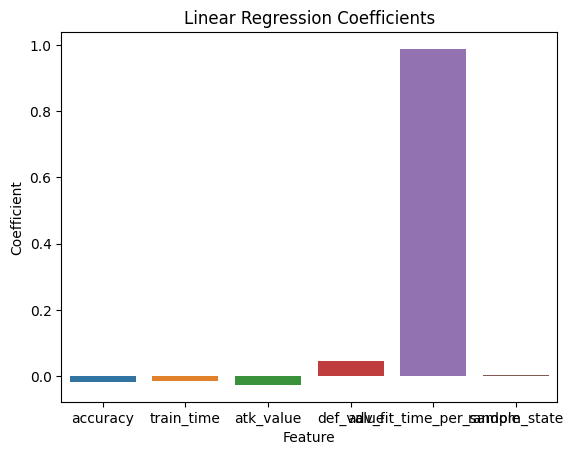

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import power_transform, StandardScaler
X = cleaned.copy()
X = X.select_dtypes(include=np.number)
X = StandardScaler().fit_transform(X)
X = power_transform(X, method='yeo-johnson')
X = pd.DataFrame(X, columns=cleaned.columns)
del X['adv_accuracy']
del X['adv_fit_time']
y = X['adv_failure_rate']
del X['adv_failure_rate']
del X['failure_rate']

model = LinearRegression()
model.fit(X, y)
coef = model.coef_
i = 0
for col in X.columns:
    print(f"{col}: {coef[i]}")
    i += 1
    
coef_df = pd.DataFrame([coef], columns=X.columns, index=["Coefficient"]).T
coef_plot = sns.barplot(data=coef_df, x=coef_df.index, y="Coefficient")
coef_plot.set_xlabel("Feature");
coef_plot.set_ylabel("Coefficient");
coef_plot.set_title("Linear Regression Coefficients");
coef_plot.set_xticklabels(["Accuracy", "Training Time", "Attack Parameter", "Defence Parameter", "Random State"], rotation=90)
coef_plot.get_figure().tight_layout()
coef_plot.get_figure().savefig(FOLDER / "linear_regression_coefficients.pdf")


In [ ]:
model = Ridge()
model.fit(X, y)
coef = model.coef_
i = 0
for col in X.columns:
    print(f"{col}: {coef[i]}")
    i += 1
    
coef_df = pd.DataFrame([coef], columns=X.columns, index=["Coefficient"]).T
coef_plot = sns.barplot(data=coef_df, x=coef_df.index, y="Coefficient")
coef_plot.set_xlabel("Feature");
coef_plot.set_ylabel("Coefficient");
coef_plot.set_title("Ridge Regression Coefficients");
coef_plot.set_xticklabels(["Accuracy", "Training Time", "Attack Parameter", "Defence Parameter", "Random State"], rotation=90)
coef_plot.get_figure().tight_layout()
coef_plot.get_figure().savefig(FOLDER / "ridge_regression_coefficients.pdf")

accuracy: -0.018272529504249096
train_time: -0.014730530521383678
atk_value: -0.027188744139210824
def_value: 0.04348565410675991
adv_fit_time_per_sample: 0.9883151238846528
random_state: 0.0019292618615443999


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (5).

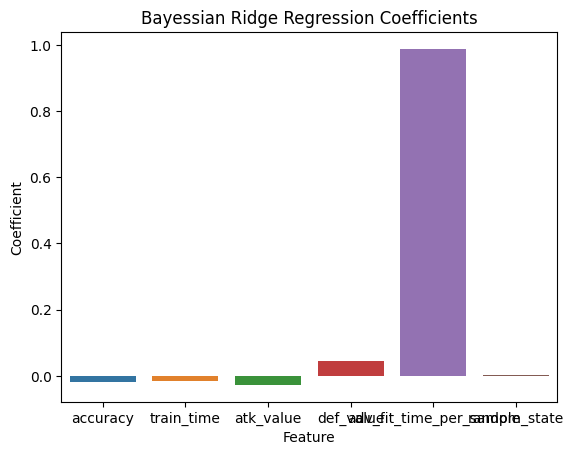

In [24]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X, y)
coef = model.coef_
i = 0
for col in X.columns:
    print(f"{col}: {coef[i]}")
    i += 1
    
coef_df = pd.DataFrame([coef], columns=X.columns, index=["Coefficient"]).T
coef_plot = sns.barplot(data=coef_df, x=coef_df.index, y="Coefficient")
coef_plot.set_xlabel("Feature");
coef_plot.set_ylabel("Coefficient");
coef_plot.set_title("Bayessian Ridge Regression Coefficients");
coef_plot.set_xticklabels(["Accuracy", "Training Time", "Attack Parameter", "Defence Parameter", "Random State"], rotation=90)
coef_plot.get_figure().tight_layout()
coef_plot.get_figure().savefig(FOLDER / "ridge_regression_coefficients.pdf")